<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [12]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [10]:
%pip install seaborn

In [26]:
%pip install scipy

In [19]:
first_10_values = df['ConvertedComp'].sort_values().head(10)
# Print the first 10 values
print(f"First 10 values in 'ConvertedComp' column:{first_10_values}")

num_zeros = (df['ConvertedComp'] == 0).sum()
print(f"Number of zeros in 'ConvertedComp' column: {num_zeros}")

top_10_max_values = df['ConvertedComp'].nlargest(10)
print(f"Top 10 maximum values in 'ConvertedComp' column:\n{top_10_max_values}")

First 10 values in 'ConvertedComp' column:982     0.0
5428    0.0
1259    0.0
7492    0.0
5070    0.0
8212    0.0
706     0.0
4628    0.0
6376    0.0
1888    0.0
Name: ConvertedComp, dtype: float64
Number of zeros in 'ConvertedComp' column: 26
Top 10 maximum values in 'ConvertedComp' column:
46     2000000.0
76     2000000.0
203    2000000.0
210    2000000.0
237    2000000.0
358    2000000.0
370    2000000.0
582    2000000.0
655    2000000.0
656    2000000.0
Name: ConvertedComp, dtype: float64


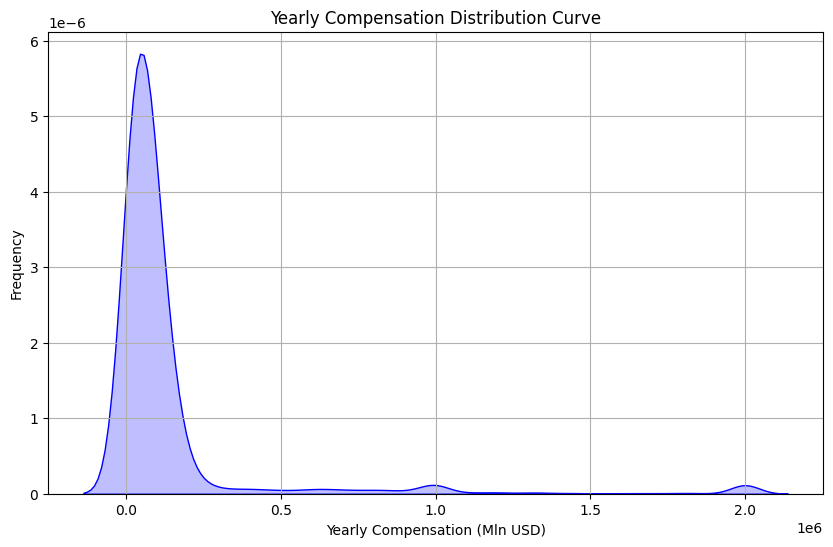

In [55]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['ConvertedComp'], color='blue', fill=True)
plt.title('Yearly Compensation Distribution Curve')
plt.xlabel('Yearly Compensation (Mln USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Plot the histogram for the column `ConvertedComp`.


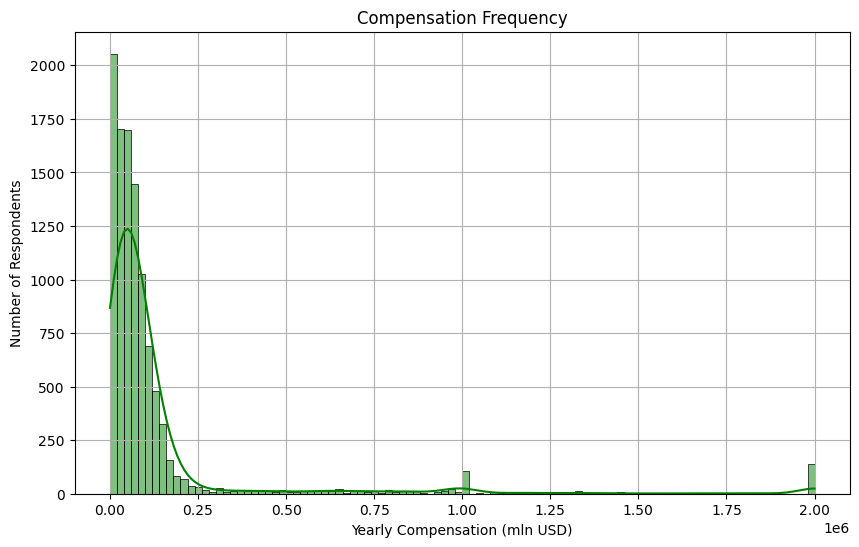

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedComp'], bins=100, kde=True, color='green')
plt.title('Compensation Frequency')
plt.xlabel('Yearly Compensation (mln USD)')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.show()


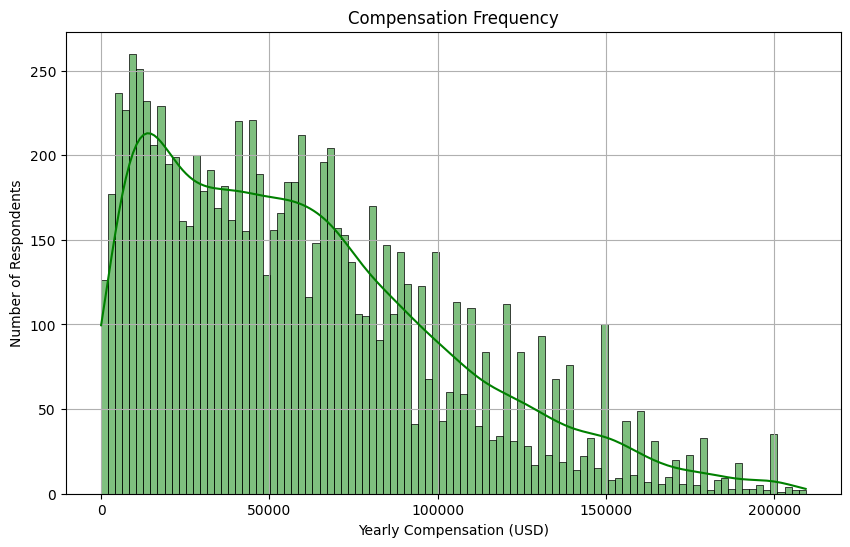

In [76]:
#no_outliers
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['ConvertedComp'], bins=100, kde=True, color='green')
plt.title('Compensation Frequency')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.show()


What is the median of the column `ConvertedComp`?


In [37]:
median_convertedComp = df['ConvertedComp'].median()
print(f"The median of ConvertedComp is: {median_convertedComp}")


The median of ConvertedComp is: 57745.0


How many responders identified themselves only as a **Man**?


In [38]:
count_man = df[df['Gender'] == 'Man'].shape[0]
print(f"Number of respondents who identified as 'Man': {count_man}")

Number of respondents who identified as 'Man': 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [99]:
woman_df = df[df['Gender'] == 'Woman']
median_converted_comp_woman = woman_df['ConvertedComp'].mean()
print(f"Median ConvertedComp for women: {median_converted_comp_woman}")

Median ConvertedComp for women: 57708.0


In [101]:
man_df = df[df['Gender'] == 'Man']
median_converted_comp_man = man_df['ConvertedComp'].mean()
print(f"Median ConvertedComp for men: {median_converted_comp_man}")

Median ConvertedComp for men: 133690.0783547558


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [45]:
summary = df['Age'].describe()
min_age = summary['min']
q1_age = summary['25%']  
median_age = summary['50%'] 
q3_age = summary['75%'] 
max_age = summary['max']

print(f"Five-number summary for Age:\n"
      f"Minimum: {summary['min']}\n"
      f"Q1: {summary['25%']}\n"
      f"Median: {summary['50%']}\n"
      f"Q3: {summary['75%']}\n"
      f"Maximum: {summary['max']}")

Five-number summary for Age:
Minimum: 16.0
Q1: 25.0
Median: 29.0
Q3: 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


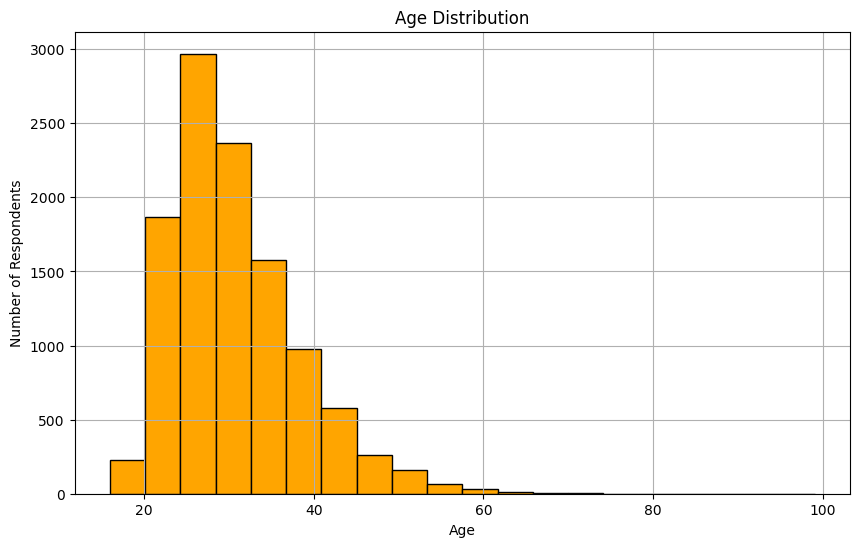

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='orange', edgecolor='black')  # Adjust number of bins as needed
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


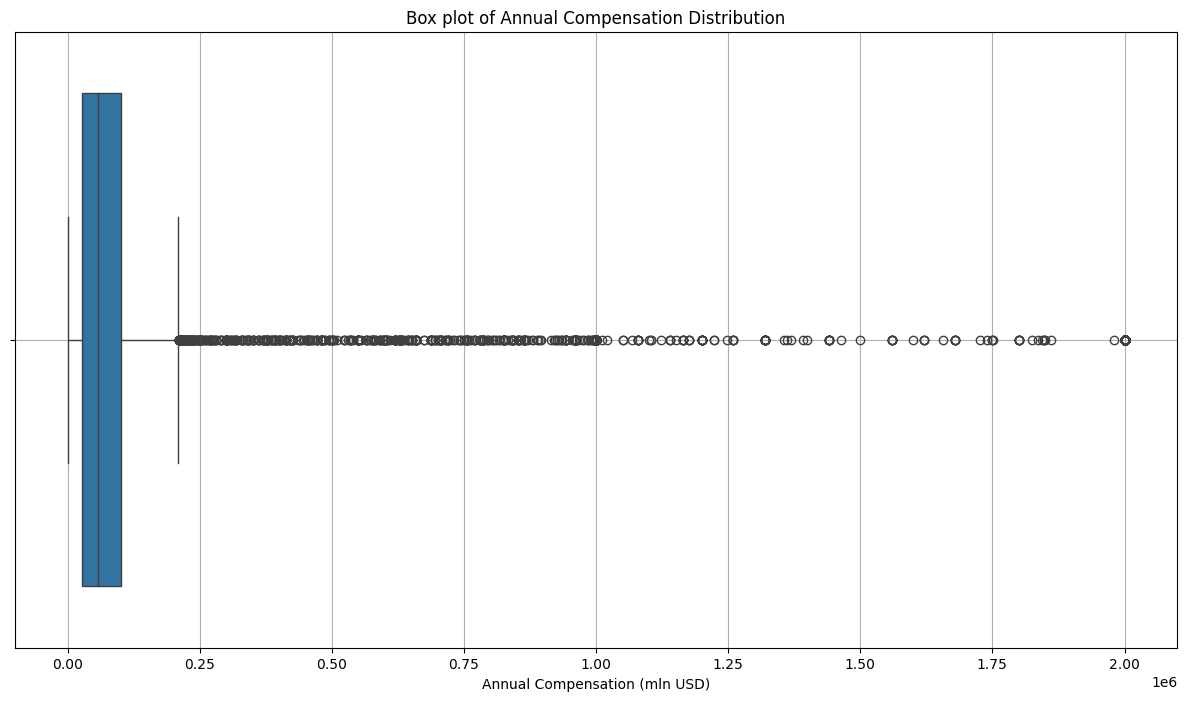

In [67]:
plt.figure(figsize=(15, 8)) 
sns.boxplot(x=df['ConvertedComp'], orient='h', whis=1.5)  
plt.title('Box plot of Annual Compensation Distribution')
plt.xlabel('Annual Compensation (mln USD)')
plt.grid(True)
plt.show()


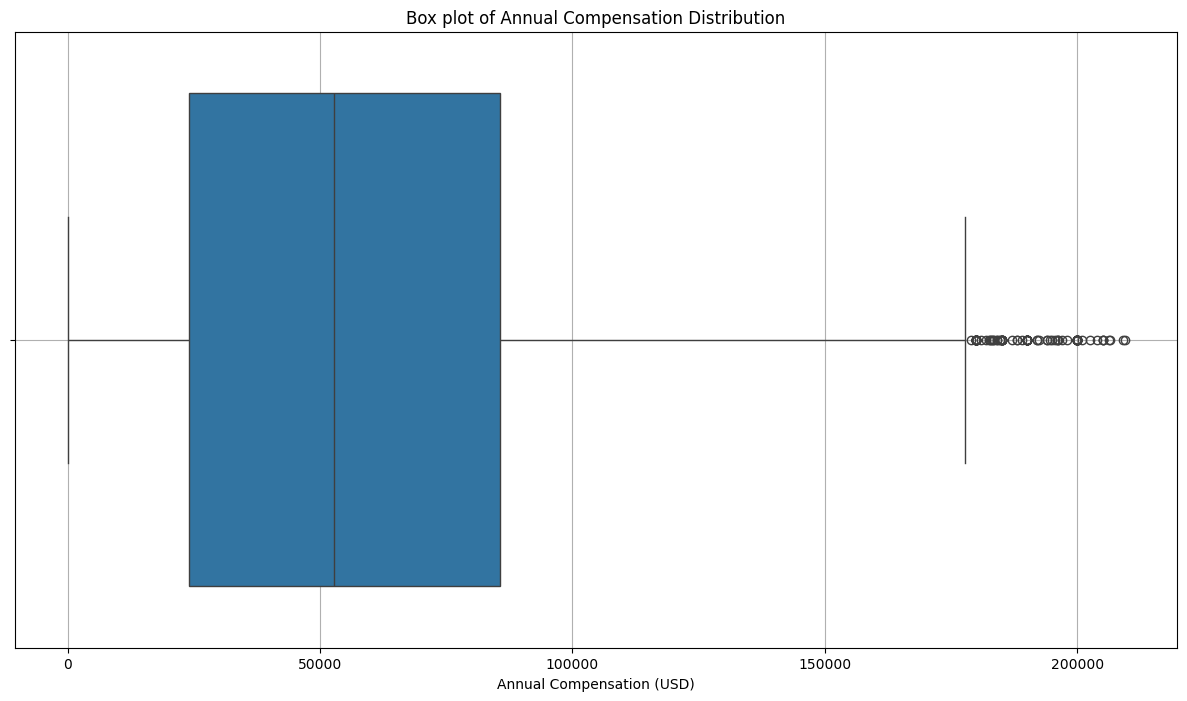

In [78]:
#no_outliers
plt.figure(figsize=(15, 8)) 
sns.boxplot(x=df_no_outliers['ConvertedComp'], orient='h', whis=1.5)  
plt.title('Box plot of Annual Compensation Distribution')
plt.xlabel('Annual Compensation (USD)')
plt.grid(True)
plt.show()


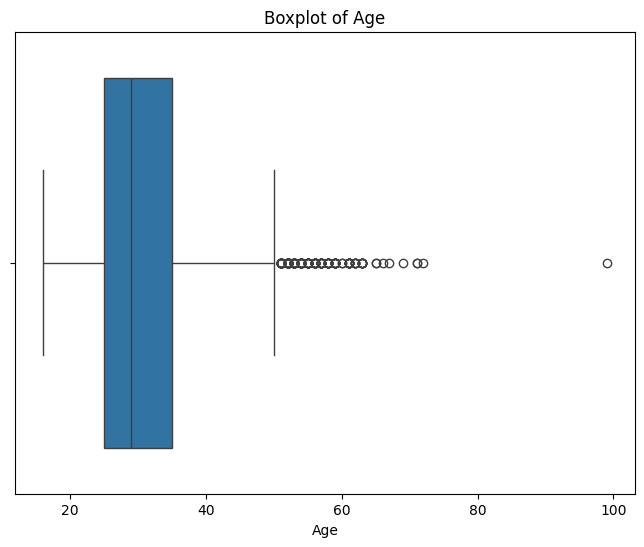

In [106]:
#Boxplot of Age
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.xlabel('Age')
plt.title('Boxplot of Age')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [70]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print(f"Interquartile Range for ConvertedComp: {IQR}")


Interquartile Range for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [71]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound for outliers: {lower_bound}")
print(f"Upper Bound for outliers: {upper_bound}")

Lower Bound for outliers: -82830.0
Upper Bound for outliers: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [72]:
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers = len(outliers)

print(f"Number of outliers in ConvertedComp column: {num_outliers}")

Number of outliers in ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [73]:
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers = len(outliers)
print(f"Original dataframe shape: {df.shape}")
print(f"New dataframe shape without outliers: {df_no_outliers.shape}")
print(f"Number of outliers removed: {num_outliers}")

Original dataframe shape: (11398, 85)
New dataframe shape without outliers: (9703, 85)
Number of outliers removed: 879


In [104]:
noOutliersmedian_convertedComp = df_no_outliers['ConvertedComp'].median()
print(f"The median of ConvertedComp without outliers is: {noOutliersmedian_convertedComp}")

The median of ConvertedComp without outliers is: 52704.0


In [105]:
noOutliersmedian_convertedComp = df_no_outliers['ConvertedComp'].mean()
print(f"The mean of ConvertedComp without outliers is: {noOutliersmedian_convertedComp}")

The mean of ConvertedComp without outliers is: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [81]:
correlation_matrix = df_no_outliers.corr(numeric_only=True)
age_correlations = correlation_matrix['Age']
print(f"Correlation between Age and other numerical columns:{age_correlations}")

Correlation between Age and other numerical columns:Respondent       0.002180
CompTotal        0.006337
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CodeRevHrs      -0.012878
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
